In [1]:
pip install radon 

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 


In [2]:
import os
from google.colab import drive


drive.mount('/drive')
os.chdir('/drive/My Drive/Sync/Programação/Github/Faculdade/Atividades disciplinas/6 periodo/PAA/sorting algorithms')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [1]:
# plot results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from results import Results
from paper_experiments import test_sort_algorithms_with_synthetic_arrays

Preorder traversal of the constructed AVL tree is
[10, 20, 25, 30, 40, 50]



In [4]:
algoritmos_1 = ["tree sort avl", "heap sort", "tim sort", "quick sort", "tree sort", "cartesian tree"]
arrays_size = list(range(10, 1001))

#results_1 = test_sort_algorithms_with_synthetic_arrays(algoritmos_1, arrays_size_1)
results_2 = test_sort_algorithms_with_synthetic_arrays(algoritmos_1, arrays_size)


tree sort avl
heap sort
tim sort
quick sort
tree sort
cartesian tree


In [5]:
results_1 = Results.load_results("resultados_algoritmos_1.csv")
results_2 = Results.load_results("resultados_algoritmos_2.csv")

In [13]:
# metrics

dataframe_completo = pd.concat([results_1.dataframe, results_2.dataframe])
dataframe_completo = dataframe_completo[dataframe_completo["atributo"] == "Tempo de execução"]

for algoritmo, dataframe in dataframe_completo.groupby("Nome do algoritmo"):
  print(algoritmo, dataframe["Valor"].mean())

cartesian tree 2.11644383333334
heap sort 8.17074041666667
quick sort 4.675180833333343
tim sort 0.7911378333333351
tree sort 4.449956083333343
tree sort avl 11.400483249999999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [0]:
results_2.save("resultados_algoritmos_2.csv")

'dataframe_1 = dataframe_1[dataframe_1["atributo"] == "Tempo de execução"]\nf = sns.factorplot(x="Nome do algoritmo", y = "Valor", hue = "Tipo array", data = dataframe_1, \n               col = "Tamanho entrada", kind=\'bar\', col_wrap = 2,size = 5,legend = True, legend_out = True,sharey=False)\n\nx_axes = f.axes[-1].get_xticklabels()\nfor ax in f.axes:\n  plt.setp(x_axes, visible=True)'

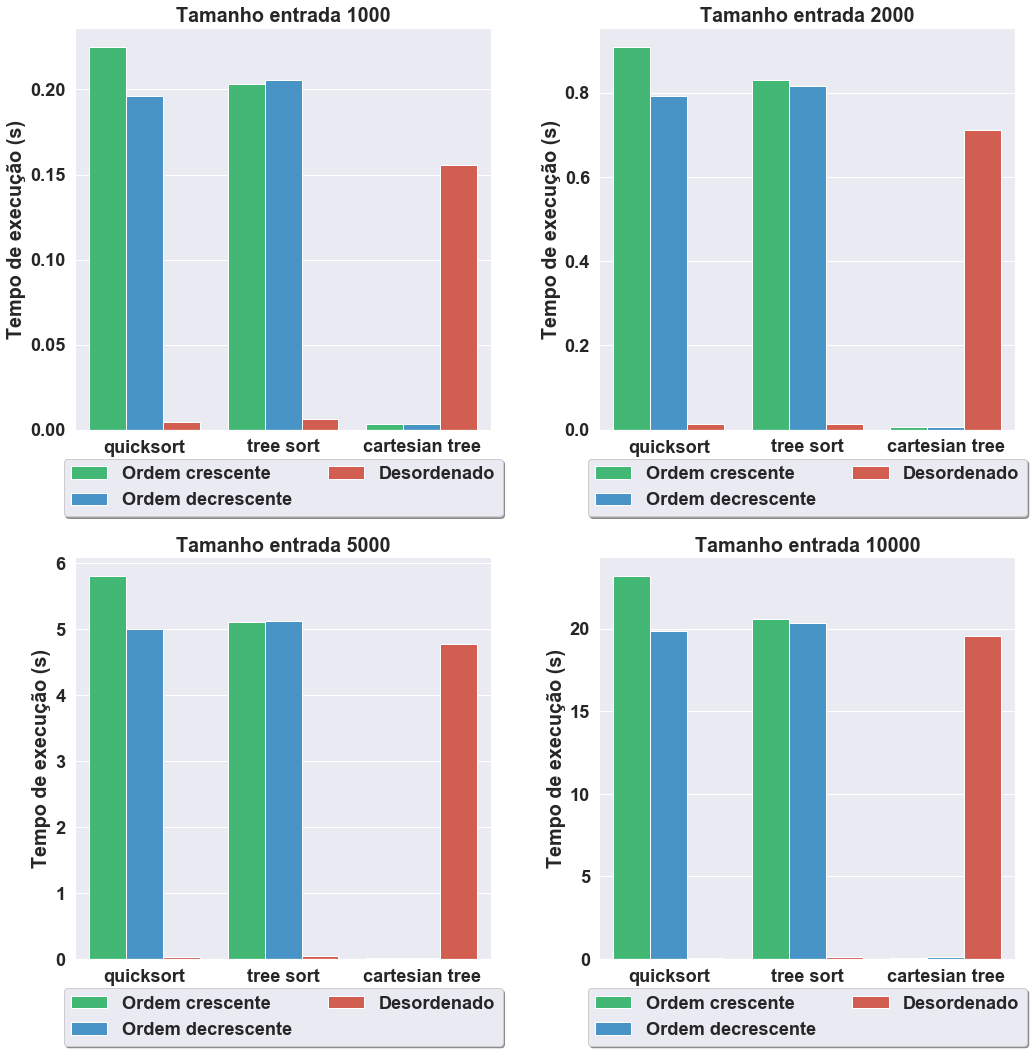

In [6]:
sns.set_style("darkgrid")
flatui = ["#2ecc71", "#3498db", "#e74c3c", "#34495e"]
sns.set_palette(flatui)
sns.set_context("notebook", font_scale=1.65, rc={"lines.linewidth": 2.5})


dataframe_1 = results_2.dataframe
dataframe_1["Tempo de execução (s)"] = dataframe_1["Valor"]
dataframe_1 = dataframe_1[dataframe_1["atributo"] == "Tempo de execução"]

fig = plt.figure(figsize=(15, 15))

cont = 1
for tamanho_entrada, dataframe in dataframe_1.groupby("Tamanho entrada"):
  ax = fig.add_subplot(2, 2, cont)

  #ax.axes.get_xaxis().set_visible(False)

  sns.barplot(x = "Nome do algoritmo", y= "Tempo de execução (s)", hue = "Tipo array", data = dataframe)
  ax.set_title(f"Tamanho entrada {tamanho_entrada}", fontweight="bold")
  ax.set_ylabel(ax.get_ylabel(), fontweight='bold')
  ax.set_xlabel("")
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, prop = {'weight':'bold'})

  plt.setp(ax.get_yticklabels(), fontweight="bold")
  plt.setp(ax.get_xticklabels(), fontweight="bold")
  cont+=1
plt.tight_layout()

"""dataframe_1 = dataframe_1[dataframe_1["atributo"] == "Tempo de execução"]
f = sns.factorplot(x="Nome do algoritmo", y = "Valor", hue = "Tipo array", data = dataframe_1, 
               col = "Tamanho entrada", kind='bar', col_wrap = 2,size = 5,legend = True, legend_out = True,sharey=False)

x_axes = f.axes[-1].get_xticklabels()
for ax in f.axes:
  plt.setp(x_axes, visible=True)"""


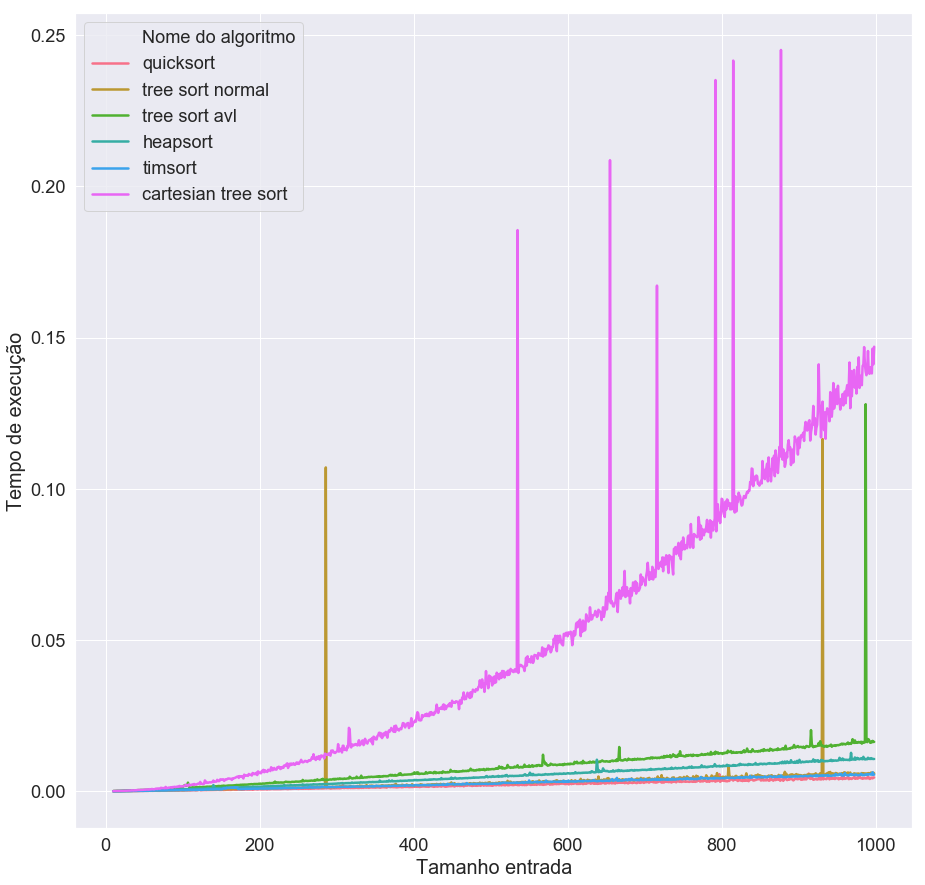

In [8]:
results = Results.load_results("synthetic_arrays_test.csv")

filters = {
    "Tipo array" : "Dersordenado", 
}
results.plot_attribute_line_plot(filters, "Tamanho entrada", "Tempo de execução")

In [19]:
df = results.dataframe

df = df[df["Tipo array"] == "info_shuffle_order"]
df = df[df["atributo"] == "time to run"]

for algorithm, dataframe in df.groupby("Nome do algoritmo"):
    print(algorithm, '{:f}'.format(dataframe["Valor"].std()))

cartesian tree sort 0.044384
heap sort 0.003235
quick sort 0.001362
tim sort 0.001649
tree sort avl 0.006151
tree sort normal 0.005218


In [34]:
# tábela da media do número de comparações 

df = results.dataframe
df = df[df["atributo"] == "number comparations"]

new_df_data = []
for (algorithm_name, array_type), dataframe in df.groupby(["Nome do algoritmo", "Tipo array"]):
    if array_type == "info_crescent_order":
        array_type = "Ordem crescente"
    elif array_type == "info_decrescent_order":
        array_type = "Ordem decrescente"
    elif array_type == "info_shuffle_order":
        array_type = "Desordenado"
    new_df_data.append([algorithm_name, array_type, int(dataframe["Valor"].mean())])
    
new_df = pd.DataFrame(data = new_df_data, columns = ["Nome do algoritmo", "Tipo lista", "Média de comparações"])

In [37]:
new_df.to_latex("latex tables/media_comparacoes_ate_1000_elementos.tex")